In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [26]:
X = np.random.randint(1,100,5000).reshape((1000,5))
k=2
X.shape

(1000, 5)

In [27]:
data = load_breast_cancer()
X = data.data
scale = StandardScaler()
X = scale.fit_transform(X)
y = data.target
k = 3

In [28]:
covM = np.cov(X,rowvar=False)
covM.shape

(30, 30)

In [29]:
eigenValues, eigenVectors = np.linalg.eig(covM)

In [30]:
eigenValues,eigenValues.shape

(array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
        1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
        4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
        2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
        5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
        7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
        1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
        3.12142606e-02, 3.00256631e-02]),
 (30,))

In [31]:
# eigenVectors,
eigenVectors.shape

(30, 30)

In [32]:
sorted_index = np.argsort(eigenValues)[::-1]
sorted_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 28, 29, 27, 26, 25, 24, 23, 22, 21, 20, 19], dtype=int64)

In [33]:
sorted_vector = eigenVectors[sorted_index]
# sorted_vector

In [34]:
bestK = sorted_vector[:k,:]

In [35]:
bestK.shape

(3, 30)

In [36]:
X_new = (bestK.dot(X.T)).T

In [37]:
X_new.shape

(569, 3)

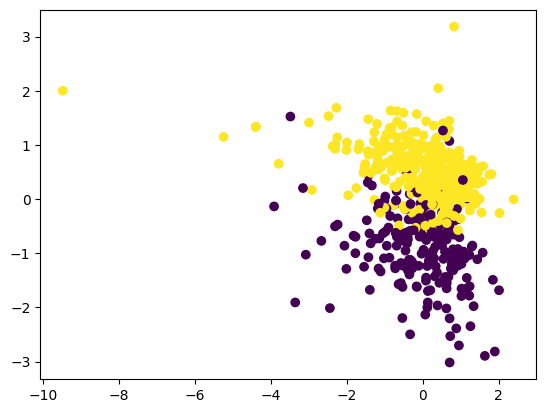

In [38]:
plt.scatter(X_new[:,0],X_new[:,1],c=y)
plt.show()

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=3)
X_new = pca.fit_transform(X)

In [41]:
X_new.shape

(569, 3)

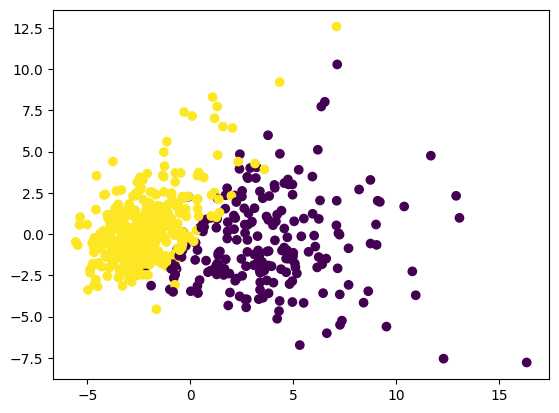

In [42]:
plt.scatter(X_new[:,0],X_new[:,1],c=y)
plt.show()

In [45]:
np.cumsum(eigenValues[sorted_index])/np.sum(eigenValues)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])